In [1]:
# Libraries

In [2]:
#Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# NLP Text Libraries 

import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naimu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naimu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naimu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
!pip install textblob

In [5]:
# EDA Analysis

# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [6]:
# Feature Engineering

In [7]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [8]:
# Model Selection and Evaluation

In [9]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [10]:
#Read The Dataset

In [11]:
dataset = pd.read_csv( r"C:/Users/naimu/Music/Optimizing Sentiment Analysis with Machine Learning and Natural Language Processing A Comparative Study of Algorithms and Techniques/Dataset/Instruments_Reviews.csv")

In [12]:
dataset.shape

(10261, 9)

In [13]:
# Data Preprocessing

In [14]:
dataset.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [15]:
#Filling Missing Values

In [16]:
dataset.reviewText.fillna(value = "", inplace = True)

In [17]:
dataset["reviews"] = dataset["reviewText"] + " " + dataset["summary"]
dataset.drop(columns = ["reviewText", "summary"], axis = 1, inplace = True)

In [18]:
# The Dataset

In [19]:
dataset.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10261
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013","Not much to write about here, but it does exac..."
freq,42,163,66,6796,NaN,NaN,40,1
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN


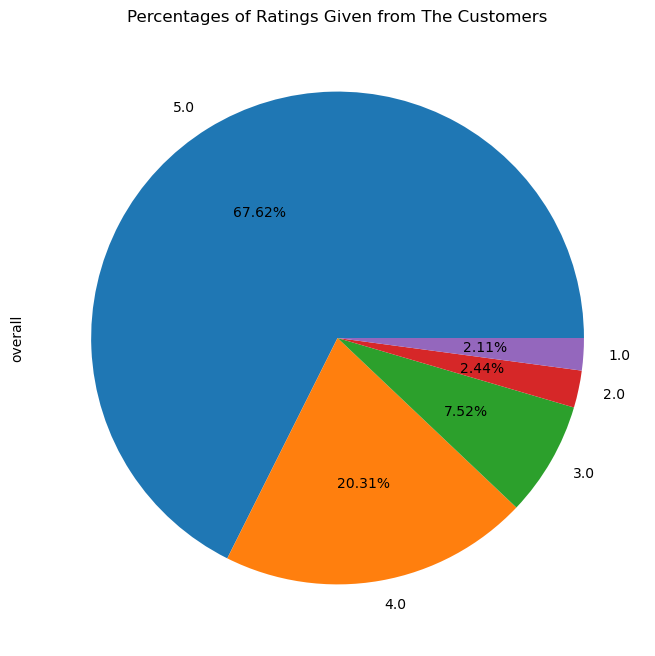

In [20]:
dataset.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

In [21]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [22]:
dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

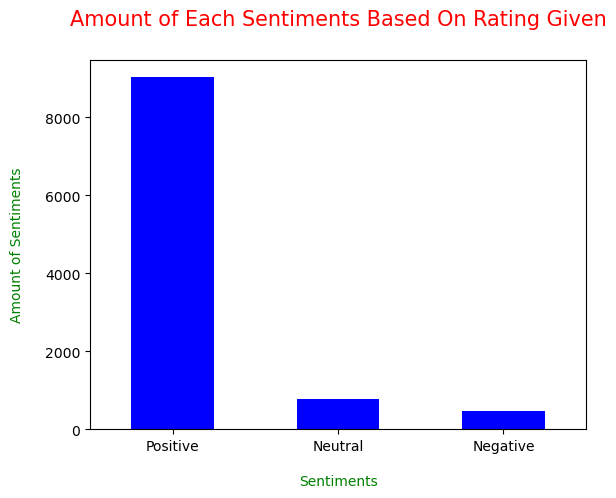

In [23]:
dataset["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [24]:
# Text Preprocessing
# Text Cleaning

In [25]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [26]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [27]:
# Apply The Function

In [28]:
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Cleaning(Text))
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Processing(Text))

In [29]:
# Exploratory Data Analysis

In [30]:
dataset.head(n = 10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",5.0,1356048000,"12 21, 2012",good bought another one love heavy cord gold c...,Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",5.0,1390089600,"01 19, 2014",used monster cable year good reason lifetime w...,Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",3.0,1353024000,"11 16, 2012",use cable run output pedal chain input fender ...,Neutral
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",5.0,1215302400,"07 6, 2008",perfect epiphone sheraton ii monster cable wel...,Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",5.0,1389139200,"01 8, 2014",monster make best cable lifetime warranty does...,Positive


In [31]:
dataset.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10254,3
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013",good string five star,Positive
freq,42,163,66,6796,NaN,NaN,40,3,9022
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN,NaN


In [32]:
dataset["polarity"] = dataset["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

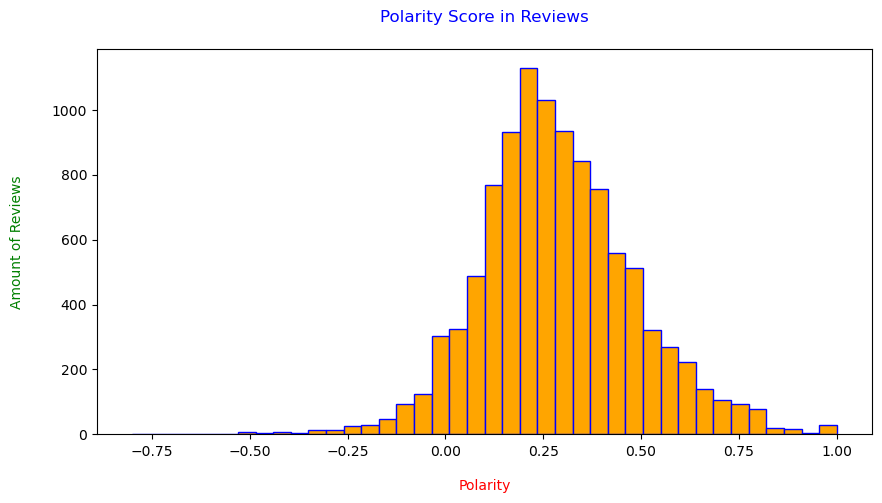

In [33]:
import matplotlib.pyplot as plt

# Assuming dataset is a DataFrame with a column named "polarity"

dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [34]:
dataset["length"] = dataset["reviews"].astype(str).apply(len)

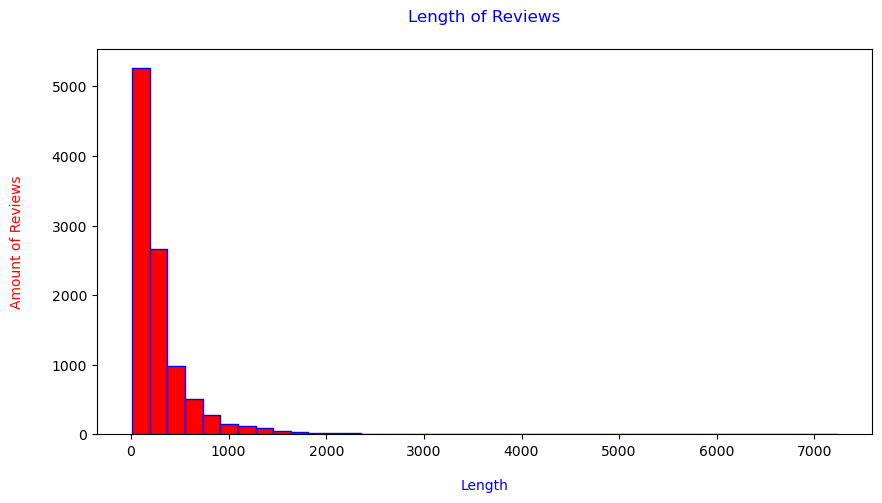

In [35]:
import matplotlib.pyplot as plt

# Assuming dataset is a DataFrame with a column named "length"

dataset["length"].plot(kind="hist", bins=40, edgecolor="blue", linewidth=1, color="red", figsize=(10, 5))
plt.title("Length of Reviews", color="blue", pad=20)
plt.xlabel("Length", labelpad=15, color="blue")
plt.ylabel("Amount of Reviews", labelpad=20, color="red")

plt.show()

In [36]:
dataset["word_counts"] = dataset["reviews"].apply(lambda x: len(str(x).split()))

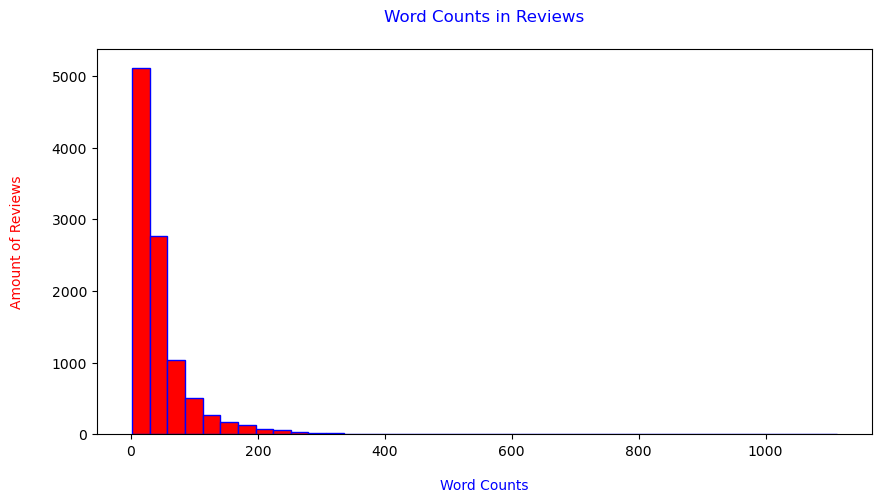

In [37]:
import matplotlib.pyplot as plt

# Assuming dataset is a DataFrame with a column named "word_counts"

dataset["word_counts"].plot(kind="hist", bins=40, edgecolor="blue", linewidth=1, color="red", figsize=(10, 5))
plt.title("Word Counts in Reviews", color="blue", pad=20)
plt.xlabel("Word Counts", labelpad=15, color="blue")
plt.ylabel("Amount of Reviews", labelpad=20, color="red")

plt.show()


In [38]:
# N-Gram Analysis

In [39]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [40]:
# Use dropna() so the base DataFrame is not affected
Positive = dataset[dataset["sentiment"] == "Positive"].dropna()
Neutral = dataset[dataset["sentiment"] == "Neutral"].dropna()
Negative = dataset[dataset["sentiment"] == "Negative"].dropna()

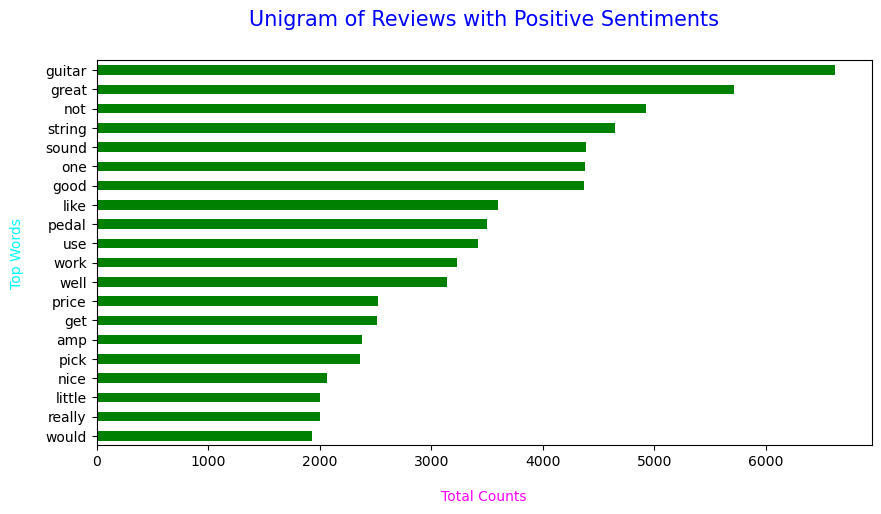

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

def Gram_Analysis(Corpus, Gram, N):
    # Set of stop words
    Stopwords = {"most", "through", "under", "it's", "nor", "there", "him", "he", "were", "now", "we", "ve", "doing", "hadn", "against", "mightn", "after", "my", "are", "each", "shouldn't", "aren", "its", "shouldn", "weren", "own", "all", "t", "ain", "been", "their", "should've", "other", "more", "what", "out", "over", "before", "on", "to", "those", "aren't", "once", "during", "has", "these", "is", "will", "wasn't", "until", "mightn't", "her", "doesn", "y", "from", "for", "doesn't", "hasn", "you'd", "yourselves", "a", "she's", "how", "of", "needn", "than", "she", "theirs", "had", "hasn", "should", "ll", "the", "yourself", "with", "about", "very", "it", "don", "o", "do", "herself", "above", "haven't", "if", "shan", "hers", "such", "wasn", "won", "too", "ourselves", "themselves", "didn", "here", "weren't", "won't", "why", "don't", "hadn't", "that", "ma", "that'll", "no", "wouldn't", "having", "d", "down", "and", "when", "this", "needn't", "into", "again", "does", "s", "ours", "you're", "who", "whom", "being", "at", "our", "can", "haven", "mustn", "me", "your", "wouldn", "which", "i", "re", "as", "both", "isn't", "you'll", "in", "where", "off", "then", "shan't", "or", "an", "am", "be", "because", "they", "so", "couldn", "m", "yours", "his", "by", "himself", "some", "them", "didn", "any", "was", "up", "further", "but", "itself", "myself", "only", "did", "while", "same", "have", "mustn", "you", "just", "couldn't", "few", "you've", "isn", "below", "between"}
    Stopwords = list(Stopwords)  # Convert set to list

    # Vectorizer
    Vectorizer = CountVectorizer(stop_words=Stopwords, ngram_range=(Gram, Gram))

    # N-Grams Matrix
    ngrams = Vectorizer.fit_transform(Corpus)

    # N-Grams Frequency
    Count = ngrams.sum(axis=0)

    # Sort Frequencies
    Frequencies = [(Word, Count[0, Index]) for Word, Index in Vectorizer.vocabulary_.items()]
    Frequencies = sorted(Frequencies, key=lambda x: x[1], reverse=True)

    return Frequencies[:N]

# Assuming Positive["reviews"] is your corpus data
words = Gram_Analysis(Positive["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns=["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh", color="green", figsize=(10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.xticks(rotation=0)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.show()

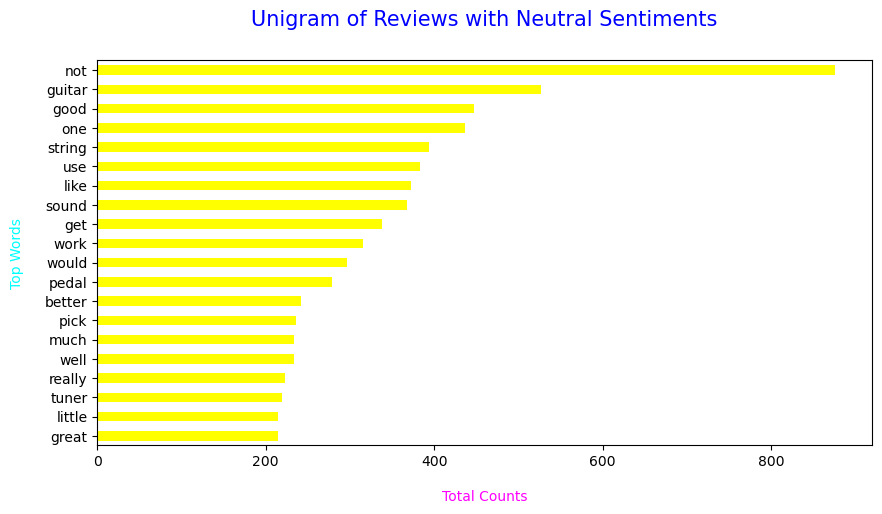

In [42]:
import matplotlib.pyplot as plt

# Assuming Neutral["reviews"] is your corpus data
words = Gram_Analysis(Neutral["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns=["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh", color="yellow", figsize=(10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.xticks(rotation=0)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.show()

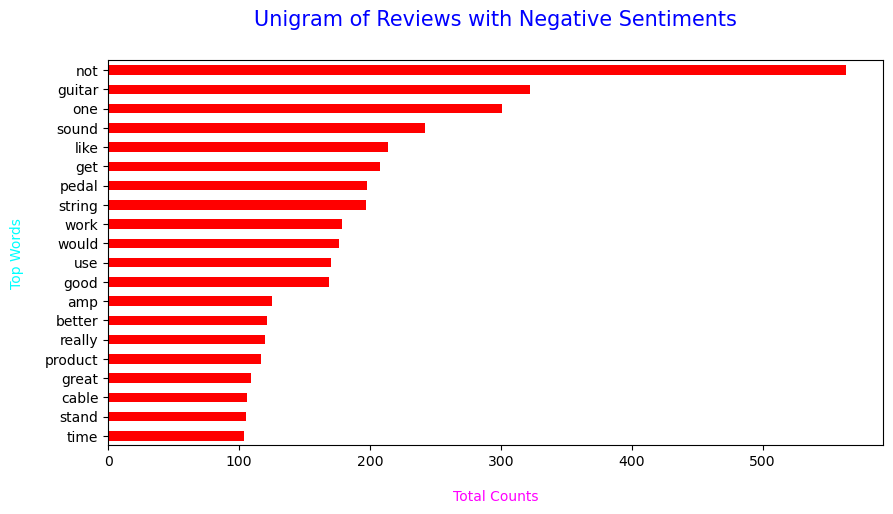

In [43]:
# Finding Unigram
words = Gram_Analysis(Negative["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

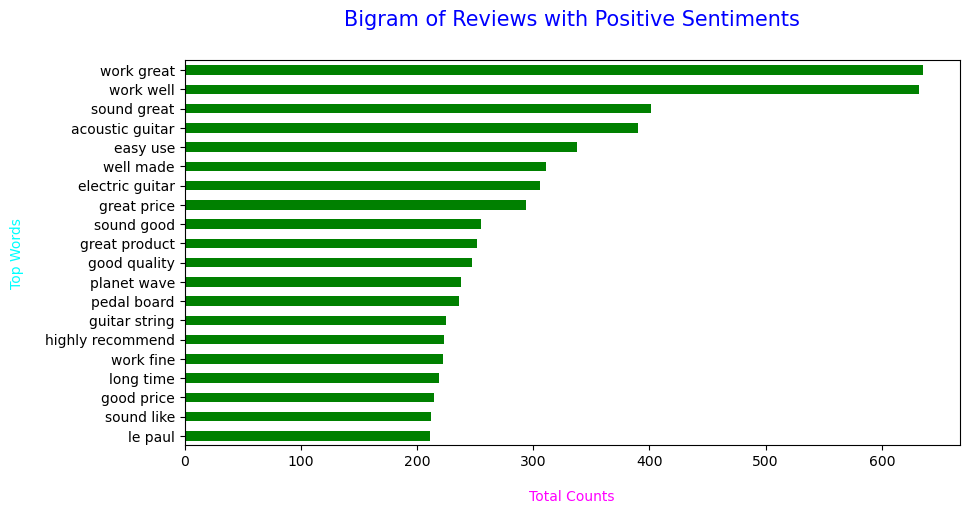

In [44]:
# Finding Bigram
words = Gram_Analysis(Positive["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

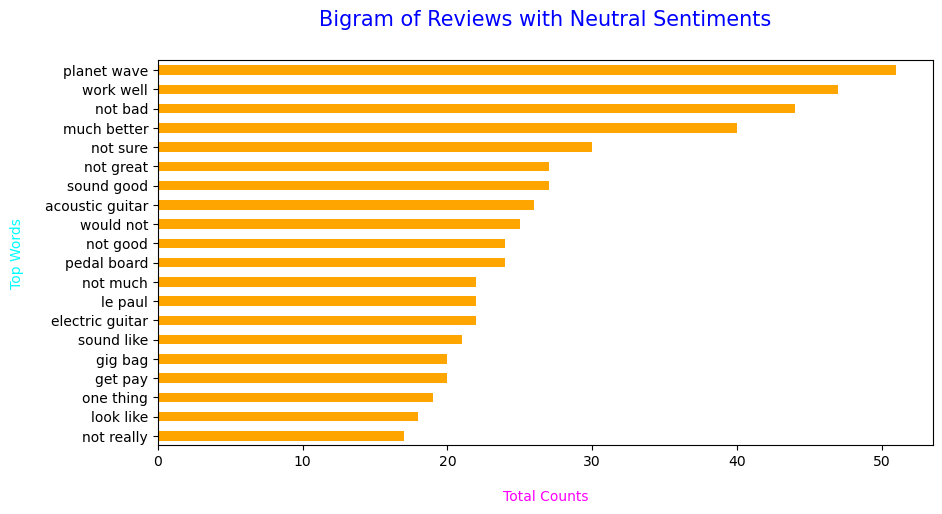

In [45]:
# Finding Bigram
words = Gram_Analysis(Neutral["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

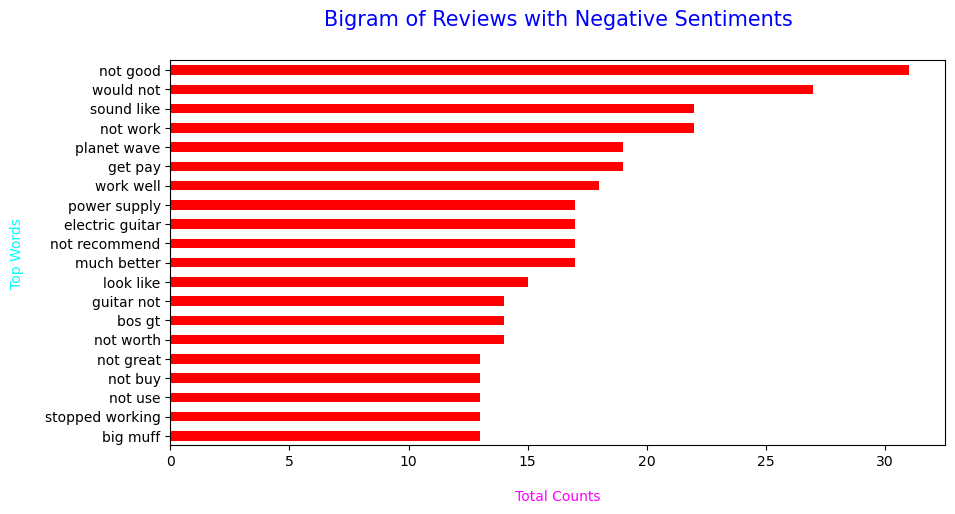

In [46]:
# Finding Bigram
words = Gram_Analysis(Negative["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

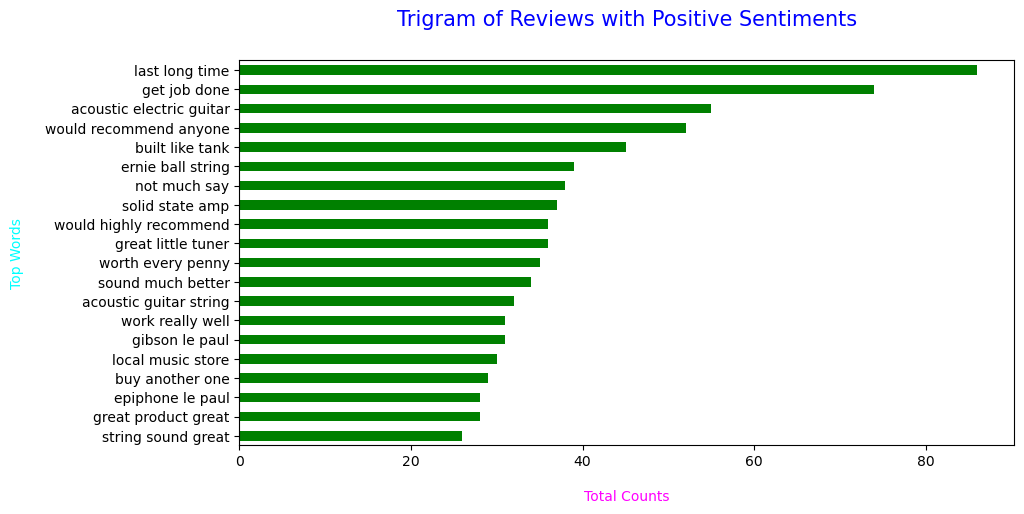

In [47]:
# Finding Trigram
words = Gram_Analysis(Positive["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

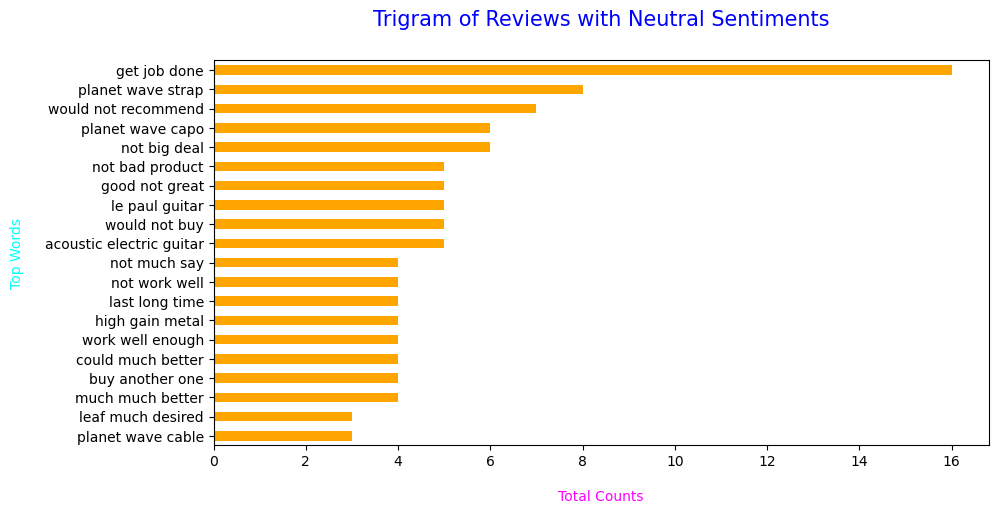

In [48]:
# Finding Trigram
words = Gram_Analysis(Neutral["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

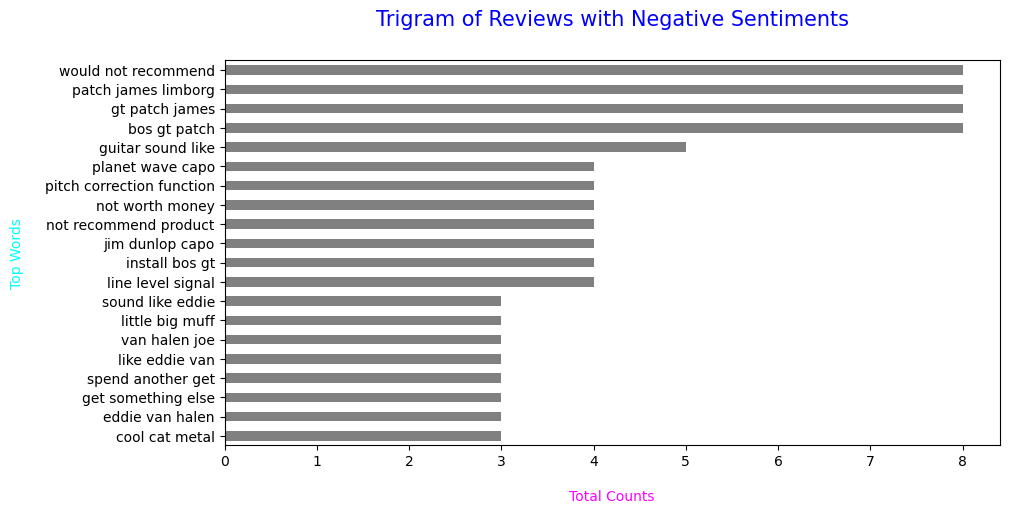

In [49]:
import matplotlib.pyplot as plt

# Assuming Negative["reviews"] is your corpus data
words = Gram_Analysis(Negative["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns=["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind="barh", color="gray", figsize=(10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.xticks(rotation=0)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)
plt.show()

In [50]:
# Word Clouds

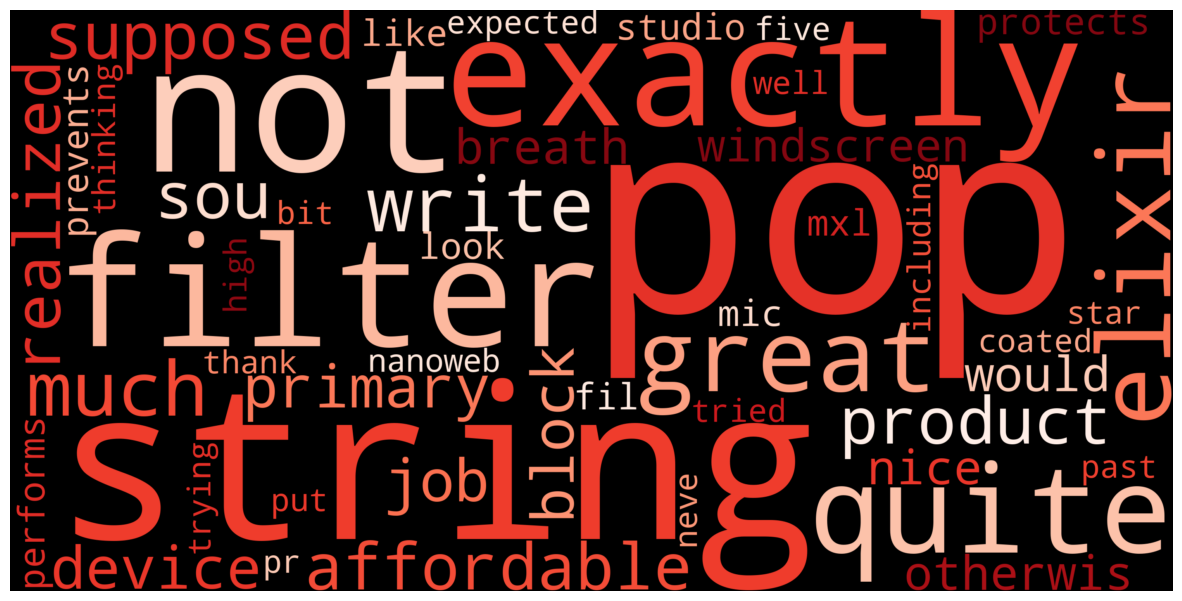

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming Stopwords is a set of stopwords
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=Stopwords, colormap='Reds').generate(str(Positive["reviews"]))
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

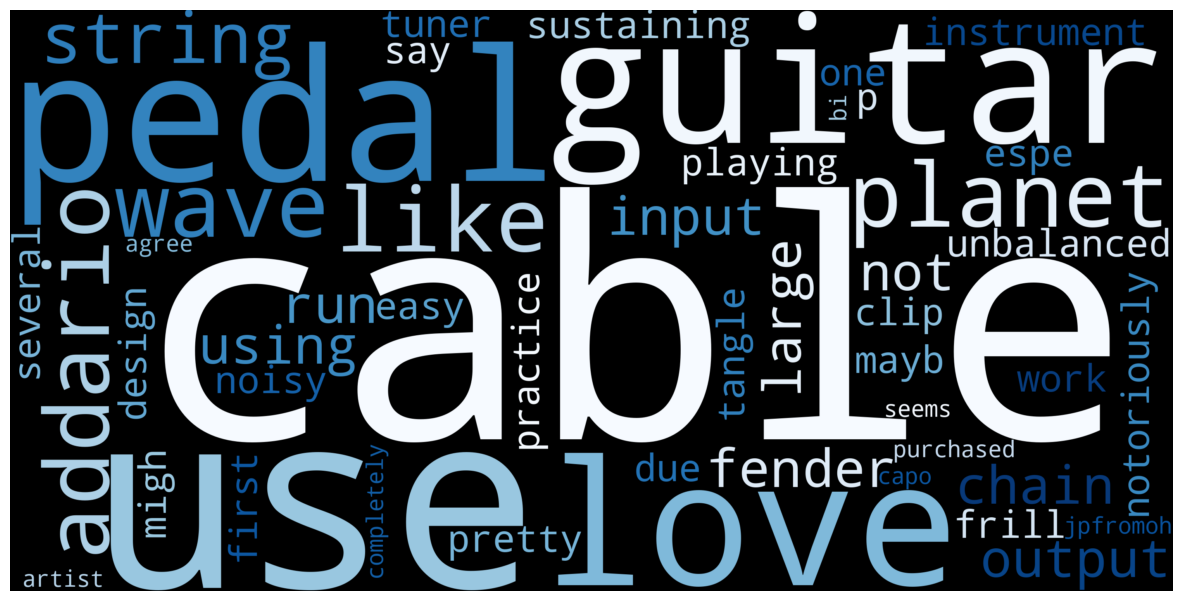

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming Stopwords is a set of stopwords
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=Stopwords, colormap='Blues').generate(str(Neutral["reviews"]))
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

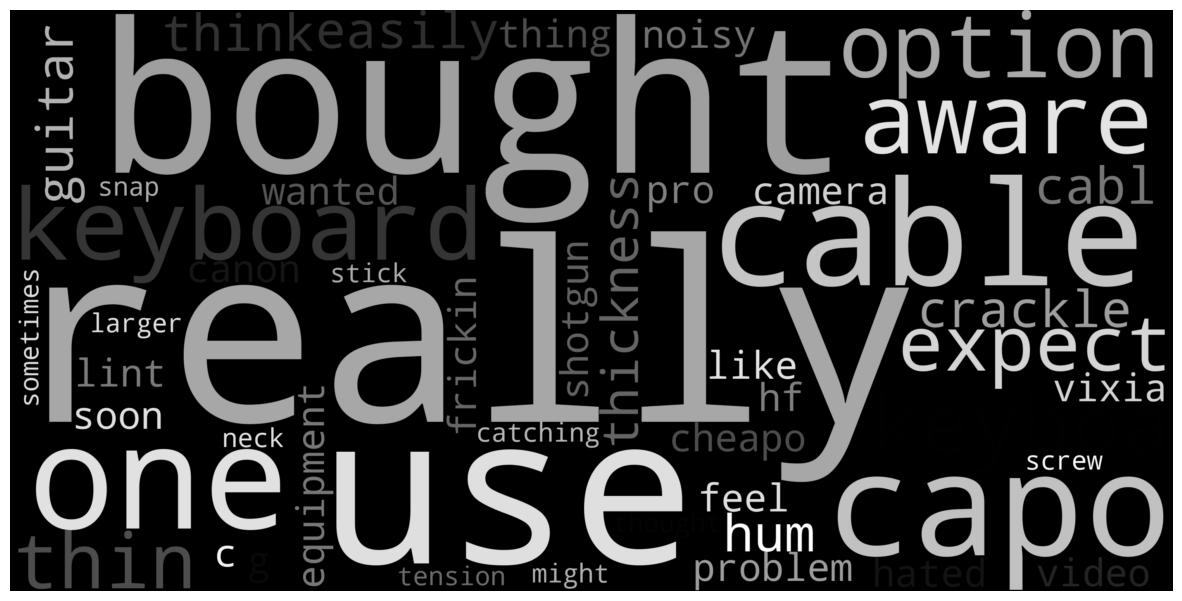

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming Stopwords is a set of stopwords
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=Stopwords, colormap='Greys').generate(str(Negative["reviews"]))
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
# Feature Engineering

In [55]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "polarity", "length", "word_counts", "overall"]
dataset.drop(columns = Columns, axis = 1, inplace = True)

In [56]:
dataset.head()

,reviews,sentiment
0,not much write exactly supposed filter pop sou...,Positive
1,product exactly quite affordable not realized ...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive


In [57]:
Encoder = LabelEncoder()
dataset["sentiment"] = Encoder.fit_transform(dataset["sentiment"])

In [58]:
dataset["sentiment"].value_counts()

2    9022
1     772
0     467
Name: sentiment, dtype: int64

In [59]:
# TF-IDF Vectorizer

In [60]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(dataset["reviews"])

# Check our matrix shape
X.shape

(10261, 5000)

In [61]:
# Declaring our target variable
y = dataset["sentiment"]

In [62]:
Counter(y)

Counter({2: 9022, 1: 772, 0: 467})

In [63]:
!pip install --upgrade scikit-learn imbalanced-learn threadpoolctl

In [64]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [65]:
!pip install --upgrade scikit-learn threadpoolctl

In [66]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [67]:
Counter(y_final)

Counter({2: 9022, 1: 9022, 0: 9022})

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

In [69]:
# Model Selection and Evaluation

In [70]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.822140700122046
Logistic Regression Test Accuracy: 0.8818828283518491
SVC Test Accuracy: 0.8805184008381876
Random Forest Test Accuracy: 0.878277349763026
Naive Bayes Test Accuracy: 0.8091794454219505
K-Neighbors Test Accuracy: 0.8474810714983934


In [71]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\naimu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\naimu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\naimu\anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\naimu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

Best Accuracy: 94.87 %
Best Parameters: {'C': 10000.0, 'penalty': 'l2'}


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

C:\Users\naimu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
accuracy_score(y_test, Prediction)

0.9522683611644747

In [74]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

In [75]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


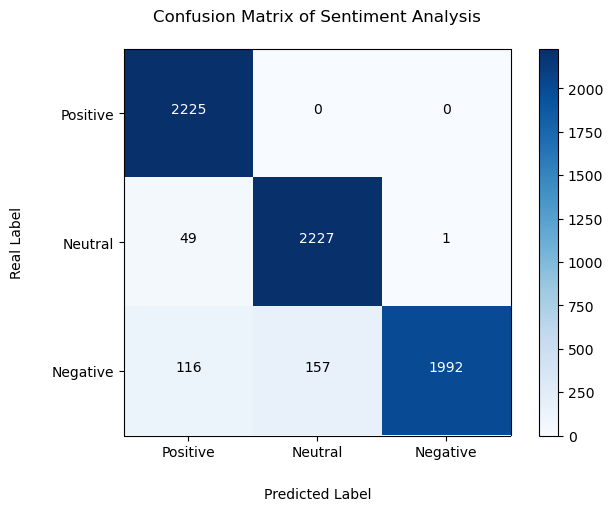

In [76]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

In [77]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2225
           1       0.93      0.98      0.96      2277
           2       1.00      0.88      0.94      2265

    accuracy                           0.95      6767
   macro avg       0.95      0.95      0.95      6767
weighted avg       0.95      0.95      0.95      6767



In [78]:
"""
1. **Data Loading and Preprocessing**:
   - The project starts by loading a dataset containing reviews and corresponding ratings from a CSV file.
   - It checks for missing values in the dataset and fills them with appropriate values.
   - It combines the review text and summary columns into a single column called "reviews".
   - Text preprocessing steps are applied to clean the text data, including converting to lowercase, removing punctuation, numbers, and hyperlinks.

2. **Exploratory Data Analysis (EDA)**:
   - The dataset's descriptive statistics are analyzed to understand its structure.
   - The distribution of ratings and sentiments (positive, neutral, negative) is visualized using pie charts and bar plots.
   - The polarity of reviews is calculated using TextBlob, and a histogram is plotted to visualize the polarity distribution.
   - Histograms are plotted to visualize the distribution of review length and word counts.

3. **N-gram Analysis**:
   - Uni-gram, bi-gram, and tri-gram frequencies are analyzed for reviews in each sentiment category (positive, neutral, negative).
   - The most common n-grams are visualized using bar plots.

4. **Word Clouds**:
   - Word clouds are generated to visualize the most common words in each sentiment category (positive, neutral, negative).

5. **Feature Engineering**:
   - Irrelevant columns like reviewer ID, product ID, reviewer name, etc., are dropped from the dataset.
   - The sentiment labels are encoded using LabelEncoder.

6. **TF-IDF Vectorization**:
   - The text data is transformed into numerical features using TF-IDF vectorization, with a maximum of 5000 features and considering bi-grams.

7. **Handling Imbalanced Data**:
   - The SMOTE (Synthetic Minority Over-sampling Technique) algorithm is used to address class imbalance in the target variable (sentiment).

8. **Model Selection and Evaluation**:
   - Several classification algorithms are trained and evaluated using cross-validation:
     - Decision Tree
     - Logistic Regression
     - Support Vector Classifier (SVC)
     - Random Forest
     - Naive Bayes
     - K-Nearest Neighbors (KNN)
   - The performance of each algorithm is evaluated based on accuracy.

9. **Hyperparameter Tuning**:
   - Grid search is performed to find the best hyperparameters for Logistic Regression, such as regularization parameter (C) and penalty.

10. **Model Training and Evaluation**:
    - The Logistic Regression model with the best hyperparameters is trained on the training data.
    - The model's performance is evaluated on the test set using accuracy score and a confusion matrix.

**Algorithms Used**:
- **Machine Learning Algorithms**: Decision Tree, Logistic Regression, Support Vector Machine (SVM), Random Forest, Naive Bayes, K-Nearest Neighbors (KNN).
- **NLP Techniques**: Text preprocessing (lowercasing, punctuation removal, lemmatization), TF-IDF vectorization, N-gram analysis, word clouds.
- **Imbalanced Learning**: SMOTE (Synthetic Minority Over-sampling Technique) for handling class imbalance.
- **Model Evaluation**: Cross-validation, grid search for hyperparameter tuning, accuracy score, confusion matrix.

"""

'\n1. **Data Loading and Preprocessing**:\n   - The project starts by loading a dataset containing reviews and corresponding ratings from a CSV file.\n   - It checks for missing values in the dataset and fills them with appropriate values.\n   - It combines the review text and summary columns into a single column called "reviews".\n   - Text preprocessing steps are applied to clean the text data, including converting to lowercase, removing punctuation, numbers, and hyperlinks.\n\n2. **Exploratory Data Analysis (EDA)**:\n   - The dataset\'s descriptive statistics are analyzed to understand its structure.\n   - The distribution of ratings and sentiments (positive, neutral, negative) is visualized using pie charts and bar plots.\n   - The polarity of reviews is calculated using TextBlob, and a histogram is plotted to visualize the polarity distribution.\n   - Histograms are plotted to visualize the distribution of review length and word counts.\n\n3. **N-gram Analysis**:\n   - Uni-gram, b

In [79]:
###  Sentiments Analysis Emotions for NLP

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
import pandas as pd

# Define file paths
train_file_path = r"C:/Users/naimu/Music/Optimizing Sentiment Analysis with Machine Learning and Natural Language Processing A Comparative Study of Algorithms and Techniques/Dataset/train.txt"
val_file_path = r'C:/Users/naimu/Music/Optimizing Sentiment Analysis with Machine Learning and Natural Language Processing A Comparative Study of Algorithms and Techniques/Dataset/val.txt'

# Read data into DataFrames
df_train = pd.read_csv(train_file_path, delimiter=';', names=['text', 'label'])
df_val = pd.read_csv(val_file_path, delimiter=';', names=['text', 'label'])

In [82]:
# Concatenate both datasets
df = pd.concat([df_train, df_val])

# Reset index
df.reset_index(inplace=True, drop=True)

# Display the first few rows of the concatenated DataFrame
print(df.head())

                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [83]:
# Accessing the 'label' column of the concatenated DataFrame
labels = df['label']

# Displaying the 'label' column
print(labels)

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
17995    sadness
17996        joy
17997        joy
17998        joy
17999        joy
Name: label, Length: 18000, dtype: object


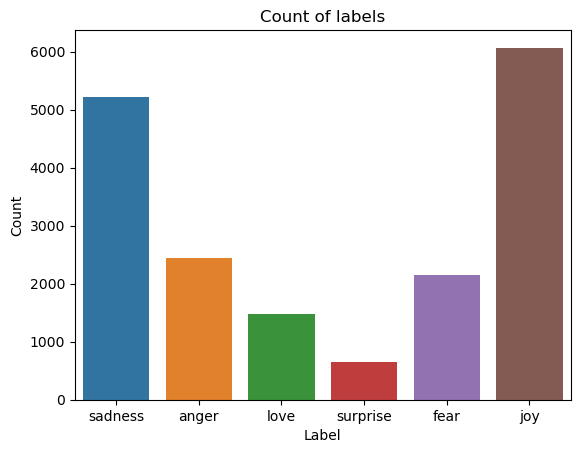

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
sns.countplot(x='label', data=df)

# Add title and labels
plt.title('Count of labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Show plot
plt.show()

In [85]:
# Replace string labels with binary values
df['label'].replace({'joy': 1, 'love': 1, 'surprise': 1, 'anger': 0, 'sadness': 0, 'fear': 0}, inplace=True)

# Print the updated 'label' column
print(df['label'])

0        0
1        0
2        0
3        1
4        0
        ..
17995    0
17996    1
17997    1
17998    1
17999    1
Name: label, Length: 18000, dtype: int64


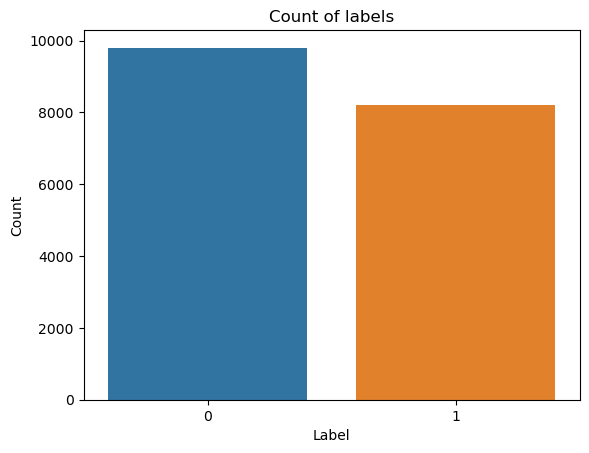

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
sns.countplot(x='label', data=df)

# Add title and labels
plt.title('Count of labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Show plot
plt.show()

In [87]:
# cleaning the data

In [88]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [89]:
#object of WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [90]:
corpus=[]
for i in range(len(df)):
    review= re.sub('[^a-zAZ]',' ',df['text'][i])
    review= review.lower()
    review= review.split()
    review= [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)
    

In [91]:
corpus[1]

'go feeling hopeless damned hopeful around someone care awake'

In [92]:
# Scikit-Learn (Machine Learning Library for Python)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
cv = CountVectorizer()

# Fit the CountVectorizer to the text data and transform it into a document-term matrix
train_data = cv.fit_transform(df['text'])

# Assign independent features (X) and dependent features (y)
X = train_data  # Independent features
y = df['label']  # Dependent features

In [94]:
# Importing necessary libraries
import numpy as np

# Checking shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (18000, 16170)
Shape of y: (18000,)


In [95]:
# Building the model on training data

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X, y)

RandomForestClassifier()

In [97]:
# Test Data Transformation

In [98]:
import pandas as pd

# Define file path for test data
test_file_path = r'C:/Users/naimu/Music/Optimizing Sentiment Analysis with Machine Learning and Natural Language Processing A Comparative Study of Algorithms and Techniques/Dataset/test.txt'

# Read data into DataFrame
test_df = pd.read_csv(test_file_path, delimiter=';', names=['text', 'label'])

# Display the first few rows of the test DataFrame
print(test_df.head())

                                                text    label
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [99]:
test_df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [100]:
#object of WordNetLemmatizer
wordnet = WordNetLemmatizer()
corpus=[]
for i in range(len(test_df)):
    review= re.sub('[^a-zAZ]',' ',test_df['text'][i])
    review= review.lower()
    review= review.split()
    review= [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)
    
X_test= cv.transform(corpus)
y_test=test_df.label.replace({'joy':1,'love':1,'surprise':1, 'anger':0,'sadness':0,'fear':0})

In [101]:
# Model Evaluation

In [102]:
y_pred= rf.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9425
Confusion Matrix:
 [[997  83]
 [ 32 888]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1080
           1       0.91      0.97      0.94       920

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

